### The effect of a drug on blood pressure of 15 patien

In [8]:

library(rjags)

cat("model{

 # likelihood
 
 for (i in 1:N){
 
  x[i] ~ dnorm(mu1, psi1)    # psi: precision not the variance
  y[i] ~ dnorm(mu2, psi2)
  
 }
 
 # prior
 
 
 psi1 ~ dgamma(0.35, 1.01)
 psi2 ~ dgamma(0.35, 1.01)
 
 mu1 ~ dnorm(0, 0.003*psi1)
 mu2 ~ dnorm(0, 0.003*psi2)

 tau1 <- 1/psi1
 tau2 <- 1/psi2
 delta <- mu1-mu2
 var.ratio <- tau1/tau2
 

}",
    
    file = "blood.jag"
)





Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 30
   Unobserved stochastic nodes: 4
   Total graph size: 46

Initializing model




Iterations = 10:10000
Thinning interval = 10 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean        SD  Naive SE Time-series SE
delta     1.862e+01 7.408e+00 2.343e-01      2.343e-01
mu1       1.768e+02 5.308e+00 1.678e-01      1.678e-01
mu2       1.582e+02 5.231e+00 1.654e-01      1.536e-01
psi1      2.592e-03 9.101e-04 2.878e-05      2.878e-05
psi2      2.730e-03 9.746e-04 3.082e-05      3.082e-05
tau1      4.376e+02 1.702e+02 5.382e+00      5.382e+00
tau2      4.185e+02 1.657e+02 5.239e+00      5.239e+00
var.ratio 1.187e+00 6.182e-01 1.955e-02      1.955e-02

2. Quantiles for each variable:

               2.5%       25%       50%       75%     97.5%
delta     4.153e+00 1.377e+01 1.839e+01 2.349e+01 3.293e+01
mu1       1.668e+02 1.734e+02 1.768e+02 1.799e+02 1.875e+02
mu2       1.483e+02 1.548e+02 1.582e+02 1.616e+02 1.683e+02
psi1      1.184e-03 1.915e-03 2.48

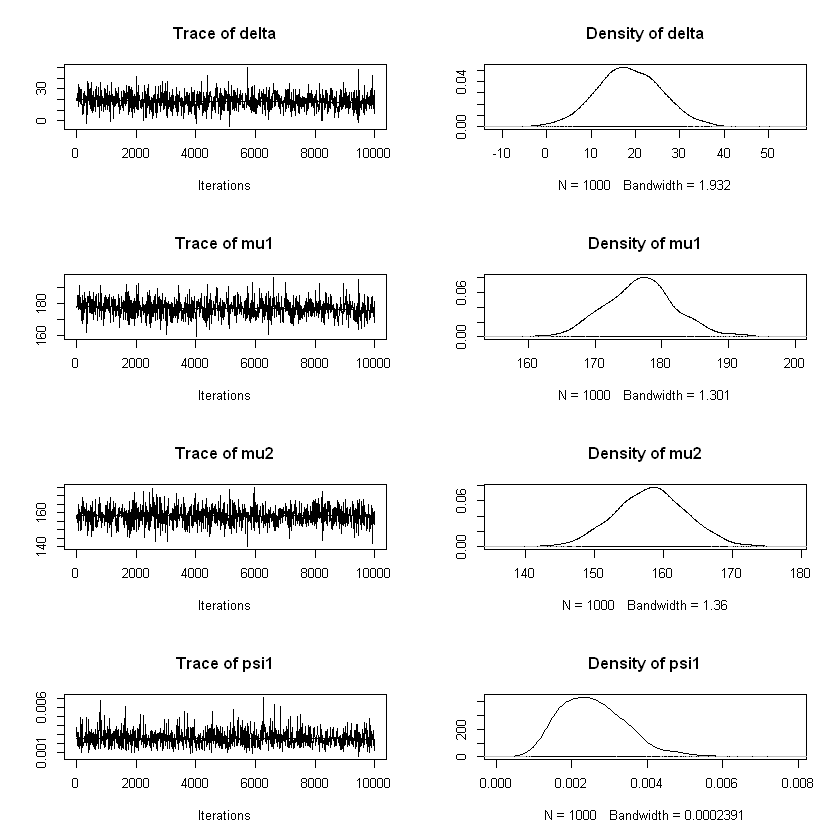

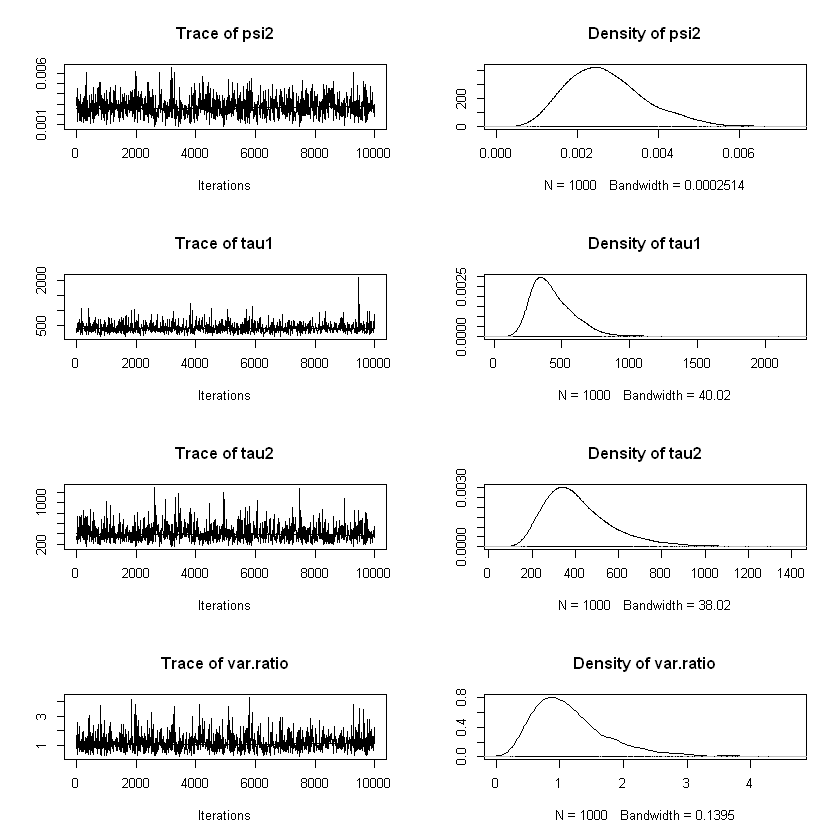

In [9]:
### MCMC
# marginal posterior distribution of the parameters - mu1, mu2, psi1, psi2, tau1, tau2 and var.ratio

blood.inits = list(mu1=160.0, mu2=160.0, psi1=1, psi2=1)

# blood pressure data of before and after taking the drug
blood.data = list(x=c(210, 169, 187, 160, 167, 176, 185, 206, 173, 146, 174, 201, 198, 148, 154),
                  y=c(201, 165, 166, 157, 147, 145, 168, 180, 147, 136, 151, 168, 179, 129, 131), N=15)

blood.pressure <- jags.model(file = 'blood.jag', data = blood.data, n.chains = 1, inits = blood.inits, n.adapt = 2000)

blood.par <- c("mu1", "mu2", "delta", "psi1", "psi2", "tau1", "tau2", "var.ratio")

blood.res <- coda.samples(blood.pressure, var=blood.par, n.iter = 10000, thin = 10)

summary(blood.res)

plot(blood.res)

In [10]:
# mean of mu1 = 176.8
# mean of mu2 = 158.2
# mu1 - mu2 = 18.6

# marginal posterior 95% hpd interval for mu

# ( 166.8, 187.5) for mu1
# (148.3, 153.6) for mu2


# Since the difference between mu1 and mu2 is 18.6, 
# we found evidence that mu2 is less than mu1. Therefore,
# we can conclude that the blood pressures after taking 
# the drug are less than the blood pressures before
# taking the drug, and so the drug is effective.